In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/home/jishnu/Desktop/data analytics/EDA/data_sets/messy_beer_servings.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    193 non-null    int64  
 1   country                       193 non-null    object 
 2   beer_servings                 185 non-null    float64
 3   spirit_servings               185 non-null    float64
 4   wine_servings                 187 non-null    float64
 5   total_litres_of_pure_alcohol  192 non-null    float64
 6   continent                     193 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 10.7+ KB


In [4]:
df.shape

(193, 7)

In [5]:
df.isnull().sum()

Unnamed: 0                      0
country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [6]:
df.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [7]:
df.tail()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
188,188,Venezuela,NaN,100.0,3.0,7.7,South America
189,189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,190,Yemen,6.0,0.0,0.0,0.1,Asia
191,191,Zambia,32.0,19.0,4.0,2.5,Africa
192,192,Zimbabwe,64.0,18.0,4.0,4.7,Africa


In [8]:
df.drop("Unnamed: 0" , axis = 1 , inplace = True)

In [9]:
df.shape

(193, 6)

In [10]:
missing_values = df.select_dtypes("float")
missing_values.columns

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'],
      dtype='object')

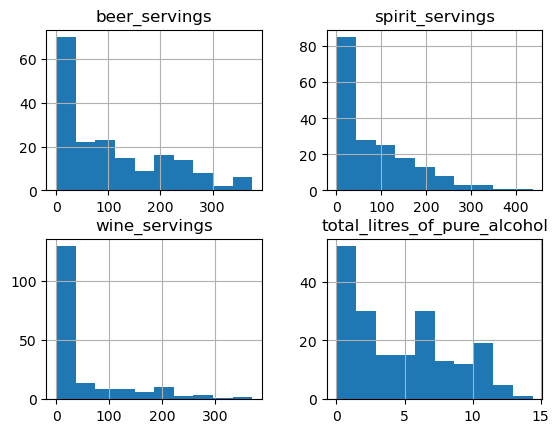

In [11]:
missing_values.hist()
plt.show()

In [12]:
for i in missing_values.columns:
    df[i] = df[i].fillna(df[i].median())
df.isnull().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

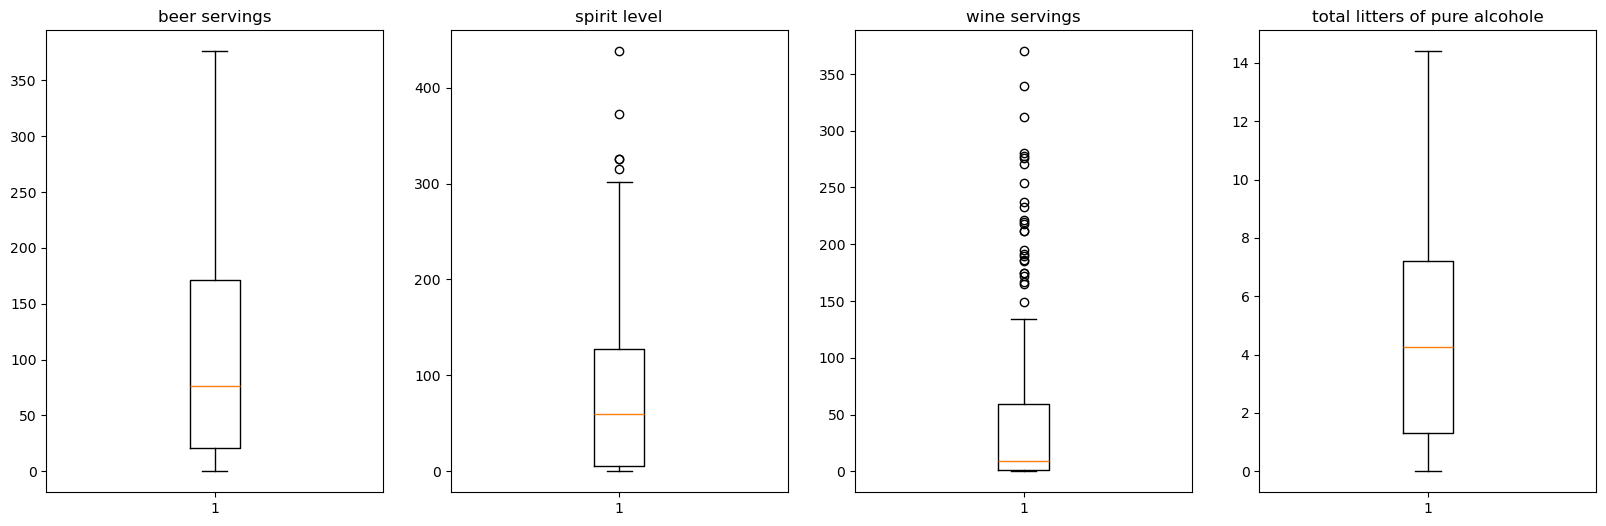

In [13]:
fig,axs = plt.subplots(1,4,figsize = (20,6))
titles = ["beer servings","spirit level","wine servings","total litters of pure alcohole"]

for i in range(len(missing_values.columns)):
    axs[i].boxplot(df[missing_values.columns [i]])
    axs[i].set_title(titles[i])

In [36]:
def outliers(df,column):
    Q1 = np.percentile(df[column],25,method = "midpoint")
    Q3 = np.percentile(df[column],75,method = "midpoint")

    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR

    return df[(df["spirit_servings"] > u) | (df["spirit_servings"] < l)]["spirit_servings"].tolist()



In [39]:
outlier = outliers(df,"spirit_servings")

outlier

[302.0]

In [25]:
outlier_values

[373.0, 438.0, 326.0, 326.0, 315.0]

In [28]:
outlier

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
15,Belarus,142.0,373.0,42.0,14.4,Europe
68,Grenada,199.0,438.0,28.0,11.9,North America
73,Haiti,1.0,326.0,1.0,5.9,North America
141,Russian Federation,247.0,326.0,73.0,11.5,Asia
144,St. Lucia,171.0,315.0,71.0,10.1,North America


In [29]:
outlier_index

Index([15, 68, 73, 141, 144], dtype='int64')

In [32]:
outlier = df[(df["spirit_servings"] > u) | (df["spirit_servings"] < l)]["spirit_servings"].tolist()
outlier

[]

In [35]:
u,l = outliers(df,"spirit_servings")
outlier = df[(df["spirit_servings"] > u) | (df["spirit_servings"] < l)]["spirit_servings"].tolist()
outlier

[302.0]